In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
%matplotlib inline

In [101]:
pwd = os.getcwd()

train_file_path = os.path.join(pwd, os.pardir, "data/train.csv")
test_file_path = os.path.join(pwd, os.pardir, "data/train.csv")
store_file_path = os.path.join(pwd, os.pardir, "data/store.csv")


In [102]:
df_train = pd.read_csv(train_file_path, dtype={'StateHoliday': object})
df_test = pd.read_csv(test_file_path, dtype={'StateHoliday': object})
df_store = pd.read_csv(store_file_path)

In [103]:
df_train_merged = pd.merge(df_train, df_store, how = 'left', on = 'Store')
df_test_merged = pd.merge(df_test, df_store, how = 'left', on = 'Store')

In [104]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [105]:
plt.style.use('seaborn')

<AxesSubplot:ylabel='Frequency'>

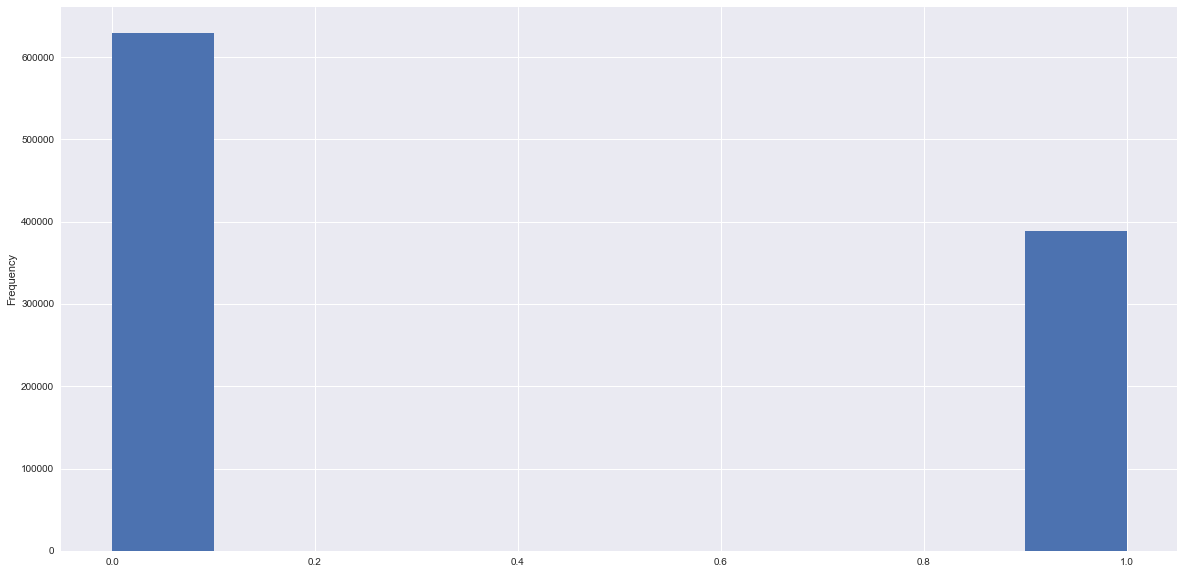

In [106]:
df_train["Promo"].plot(kind="hist", figsize=(20, 10))

<AxesSubplot:ylabel='Frequency'>

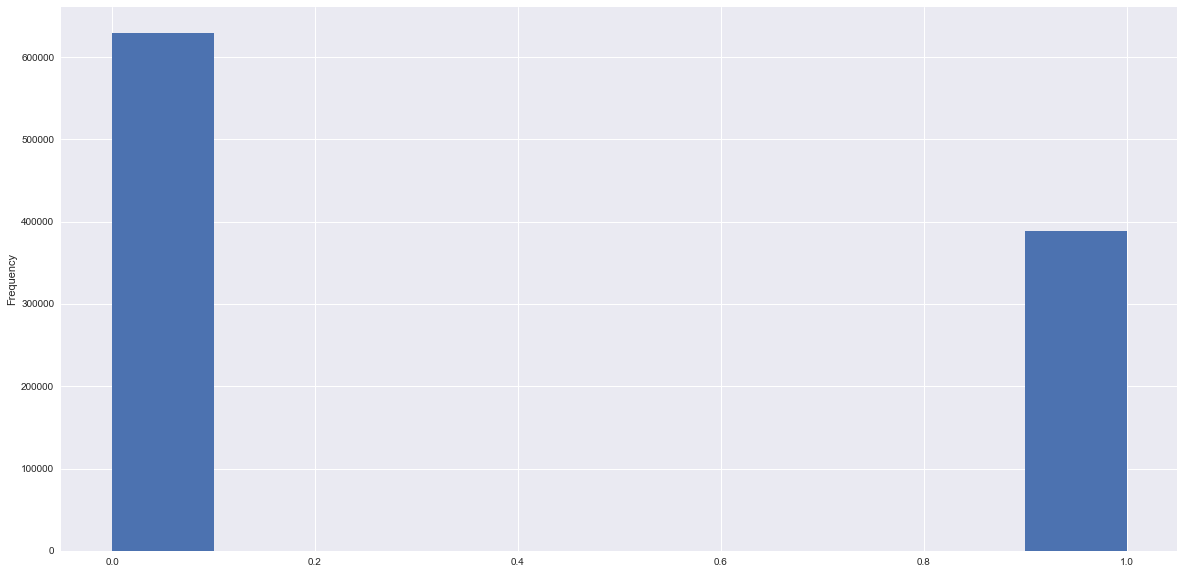

In [151]:
df_test["Promo"].plot(kind="hist", figsize=(20, 10))

Both the train and test datasets have similar promo distributions

In [108]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [126]:
sales_before_holiday = df_train.loc[(df_train["StateHoliday"] == "0") & (df_train["Open"] == 1)]

In [142]:
sales_before_holiday.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


<AxesSubplot:>

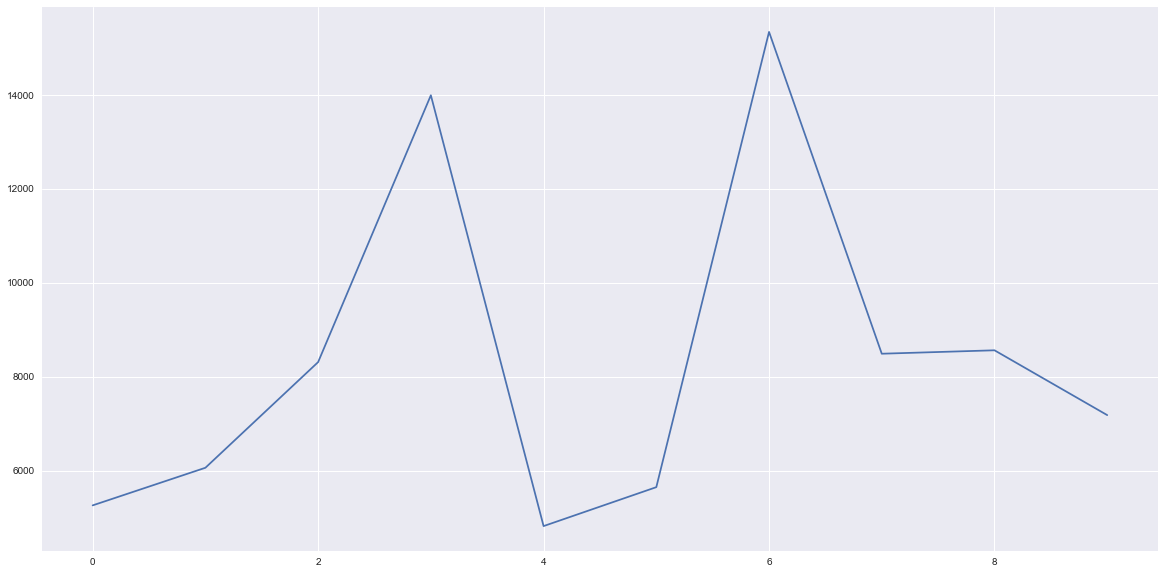

In [145]:
sales_before_holiday["Sales"][:10].plot(figsize=(20, 10))

In [139]:
seasonal_purchases = df_train.loc[(df_train["StateHoliday"] != "0") & (df_train["StateHoliday"] != "a") & (df_train["Open"] == 1)]

In [140]:
seasonal_purchases.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
129424,85,1,2015-04-06,11675,1706,1,0,b,1
129461,122,1,2015-04-06,3651,485,1,0,b,1
129548,209,1,2015-04-06,1419,145,1,0,b,1
129598,259,1,2015-04-06,17466,3134,1,0,b,1
129601,262,1,2015-04-06,33655,5152,1,0,b,0


<AxesSubplot:>

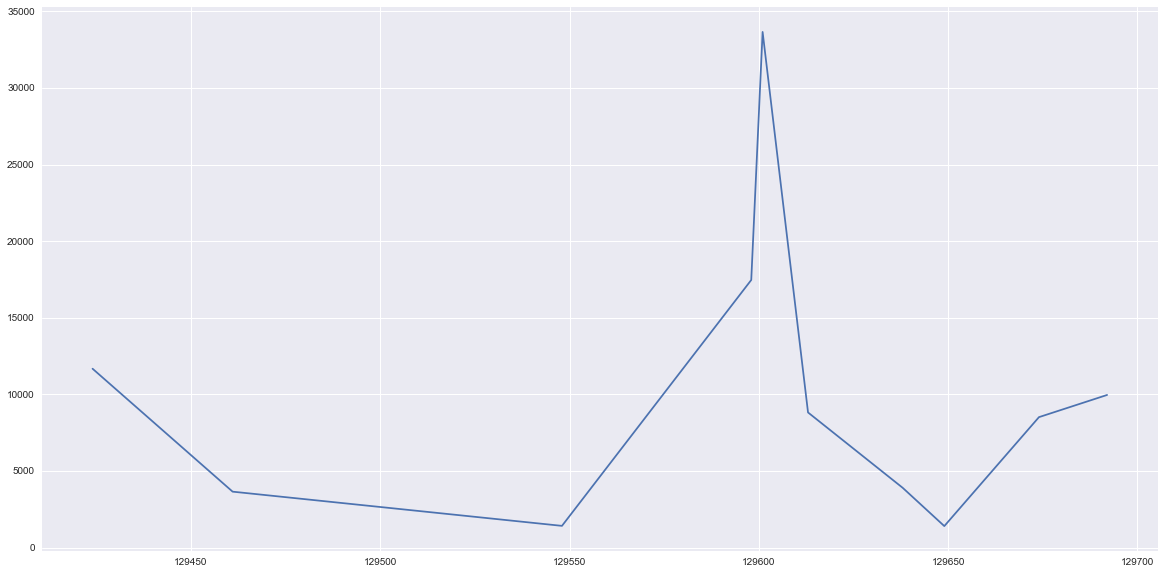

In [146]:
seasonal_purchases["Sales"][:10].plot(figsize=(20, 10))

In [92]:
df_train.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000


<AxesSubplot:>

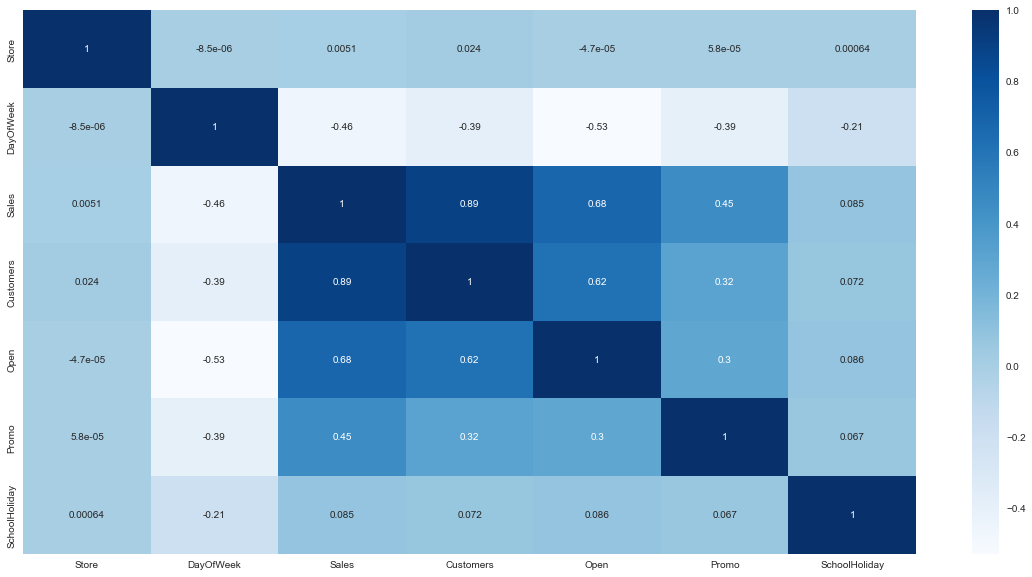

In [99]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(data=df_train.corr(), cmap="Blues", ax=ax, annot=True)

Sales and Number of customers are highly correlated as expected

In [149]:
df_train["Store"].nunique()

1115